<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [24]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [25]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import matplotlib.pyplot as plt

Download the webpage at the url


In [26]:
html = requests.get(url).text

Create a soup object


In [27]:
soup = BeautifulSoup(html, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  <hr/>
  <h2>
   Popular Programming Languages
  </h2>
  <hr/>
  <p>
   Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.
  </p>
  <p>
   There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.
  </p>
  <p>
   Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When usin

Scrape the `Language name` and `annual average salary`.


In [46]:
# Find the table in the parsed HTML
table = soup.find('table')

# Initialize a list to store the rows
rows = []

# For each row in the table
for tr in table.find_all('tr'):
    # Find all the columns
    td = tr.find_all('td')
    # Get the text from each column and store it in a list
    row = [i.text for i in td]
    # Append the list of column texts to the list of rows
    rows.append(row)

# Convert the list of rows into a DataFrame
df = pd.DataFrame(rows, columns=["No.", "Language", "Created By", "Average Annual Salary", "Learning Difficulty"])

# Remove the first row from the DataFrame
df = df.iloc[1:]
df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(int)
df.sort_values(by=['Average Annual Salary'], inplace=True, ascending=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 8 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   No.                    10 non-null     object
 1   Language               10 non-null     object
 2   Created By             10 non-null     object
 3   Average Annual Salary  10 non-null     int64 
 4   Learning Difficulty    10 non-null     object
dtypes: int64(1), object(4)
memory usage: 480.0+ bytes


Save the scrapped data into a file named *popular-languages.csv*


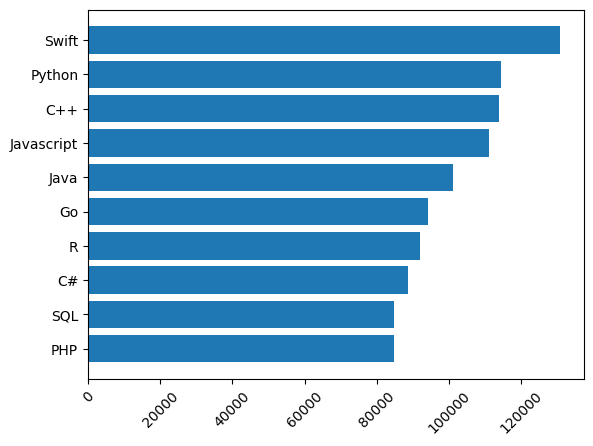

In [47]:
plt.barh(df['Language'], df['Average Annual Salary'])
plt.xticks(rotation=45)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
